# Topic Modeling (Prepare)

On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophisticated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifying common themes in customer reviews
* Discovering the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* Part 0: Warm-Up
* Part 1: Describe how an LDA Model works
* Part 2: Estimate a LDA Model with Gensim
* Part 3: Interpret LDA results & Select the appropriate number of topics

# Part 0: Warm-Up
How do we do a grid search? 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# this is the dataset that we'll be using for topic modeling as well 
# RUNTIME ISSUE ADVISE: 
# IF YOUR CODE TAKES TOO LONG TO RUN, TRY TAKING A RANDOM SUBSAMPLE OF THE DATA. GET EVERYTHING TO RUN ON A SMALL DATASET, ONCE THAT WORKS INCREASE THE SIZE OF THE DATASET
# ALTERNATIVELY, YOU COULD WORK WITH 3 OR 4 TOPICS INSTEAD OF ALL 20 JUST AS WE DID IN YESTERDAY'S LESSON 

# for simplicity, I'm going to only work with 3 topics 
categories = ["comp.sys.mac.hardware", 
              "comp.graphics", 
              "sci.space"]
data = fetch_20newsgroups(categories=categories)

In [4]:
data.target[:5]

array([1, 2, 1, 2, 0])

In [5]:
data.target_names

['comp.graphics', 'comp.sys.mac.hardware', 'sci.space']

In [6]:
data['data'][1000]

"From: ayr1@cunixa.cc.columbia.edu (Amir Y Rosenblatt)\nSubject: Power Supplies for Mac 512's\nSummary: I need them\nNntp-Posting-Host: cunixa.cc.columbia.edu\nReply-To: ayr1@cunixa.cc.columbia.edu (Amir Y Rosenblatt)\nOrganization: Columbia University\nLines: 13\n\n\nI thnik i'll be able to pick up  a piar of Mac 512K's for nothing, but\ntheir power supplies are dead.  Anyone know where I can pick up a pair\nof refurbished PS's for cheap (preferably mail order).\nYes, I do have uses planned fior them.  One will be sold to a friend who\njust needs a terminal to connect via modem to his e-mail account.\nThe other will be used by me as a net client to run my downloads and/or\nprinting.\n  \nAlso, what is the latest system software usable with these suckers?\n\n\n\n"

### GridSearch on Just Classifier
* Fit the vectorizer and prepare BEFORE it goes into the gridsearch

In [7]:
v1 = TfidfVectorizer(stop_words="english")
X = data['data'] # raw text data
X_train = v1.fit_transform(X)

In [8]:
X_train # doc-term matrix

<1755x28321 sparse matrix of type '<class 'numpy.float64'>'
	with 174095 stored elements in Compressed Sparse Row format>

In [11]:
# parameter dict
p1 = {
    'n_estimators':[10,20],
    'max_depth': [None, 7]
}

In [13]:
clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=5,n_jobs=-1, verbose=1)
gs1.fit(X_train, data['target'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#gs1.predict(["Sample text"])

In [14]:
user_data_from_website = ["I like medical science and doctors and good health."]
test_sample = v1.transform(user_data_from_website)
test_sample.shape

(1, 28321)

In [16]:
test_sample.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [17]:
pred = gs1.predict(test_sample)
pred

array([0])

In [19]:
data['target_names'][pred[0]]

'comp.graphics'

### GridSearch with BOTH the Vectoizer & Classifier

In [20]:
from sklearn.pipeline import Pipeline

v2 = TfidfVectorizer()
clf = RandomForestClassifier()

pipe = Pipeline([
    ('vect', v2),
    ('clf', clf)
])

p2 = {
    'vect__max_features':[1000,5000],
    'clf__n_estimators':[10,20],
    'clf__max_depth': [None, 7]
}

gs2 = GridSearchCV(pipe, p2, cv=5,n_jobs=-1, verbose=1)
gs2.fit(data['data'], data['target'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [21]:
pred = gs2.predict(["Sample text"])

In [22]:
data['target_names'][pred[0]]

'comp.graphics'

Advantages to using GS with the Pipe:
* Allows us to make predictions on raw text increasing reproducibility. :)
* Allows us to tune the parameters of the vectorizer along side the classifier. :D 

# Part 1: Describe how an LDA Model works

[Your Guide to Latent Dirichlet Allocation](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

[LDA Topic Modeling](https://lettier.com/projects/lda-topic-modeling/)

[Topic Modeling with Gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [ ]:
# # Download spacy model
# alternative way to download the pre-trained model
# import spacy.cli
# spacy.cli.download("en_core_web_lg")

In [9]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# these are all gensim imports 
# check out the gensim docs: https://radimrehurek.com/gensim/
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# we use spacy to load in the word2vec model 
import spacy

# all these imports are for the data viz tool that we use to look at the LDA results and manually determine the topics in our dataset 
# check out the docs: https://pyldavis.readthedocs.io/en/latest/readme.html
# the docs also have an EXAMPLE NOTEBOOK that is more detailed about this data viz tool than our lecture notebook: https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# load text data into dataframe because pandas dataframes are our prefered way to perform data manipulations 
df = pd.DataFrame({
    'content': data['data'],
    'target': data['target'],
    'target_names': [data['target_names'][i] for i in data['target']]
})

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
df.head()

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names
0,From: meharg@kits.sfu.ca (Gersham William Meha...,1,comp.sys.mac.hardware
1,From: sheaffer@netcom.com (Robert Sheaffer)\nS...,2,sci.space
2,From: winstead@faraday.ece.cmu.edu (Charles Ho...,1,comp.sys.mac.hardware
3,From: ralph.buttigieg@f635.n713.z3.fido.zeta.o...,2,sci.space
4,From: ednobles@sacam.OREN.ORTN.EDU (Edward d N...,0,comp.graphics


#### Some data cleaning before modeling

In [12]:
# This step by step way is one way to perform data cleaning (which is minimal here)
# my advise is to create a function called clean_data where all cleaning transformations happen in that function
# and you only have to call the .apply() method once
# i.e. def clean_data(text)
#          # include data cleaning code here
#          return text 
#
# i.e. df['content'] = df['content'].apply(lambda row: clean_data(row))

# Remove whitespace
df['content'] = df['content'].apply(lambda x: x.strip())
# Remove Emails
df['content'] = df['content'].apply(lambda x: re.sub('From: \S+@\S+', '', x))
# Remove new line characters
df['content'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))
# Remove non-alphanumeric characters
df['content'] = df['content'].apply(lambda x: re.sub('[^0-9 a-zA-Z]+', '', x))

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:13: DeprecationWarning: invalid escape sequence \S
<>:15: DeprecationWarning: invalid escape sequence \s
<>:13: DeprecationWarning: invalid escape sequence \S
<>:15: DeprecationWarning: invalid escape sequence \s
<>:13: DeprecationWarning: invalid escape sequence \S
<>:15: DeprecationWarning: invalid escape sequence \s
<ipython-input-12-fb02dbe85574>:13: DeprecationWarning: invalid escape sequence \S
  df['content'] = df['content'].apply(lambda x: re.sub('From: \S+@\S+', '', x))
<ipython-input-12-fb02dbe85574>:15: DeprecationWarning: invalid escape sequence \s
  df['content'] = df['content'].apply(l

In [13]:
df.head()

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names
0,Gersham William Meharg Subject Re Centris 610...,1,comp.sys.mac.hardware
1,Robert Sheaffer Subject Re Astronomy Program ...,2,sci.space
2,Charles Holden Winstead Subject ftp site for ...,1,comp.sys.mac.hardware
3,Ralph Buttigieg Subject Why not give 1 billio...,2,sci.space
4,Edward d Nobles Subject windows imagine Organ...,0,comp.graphics


In [16]:
# if running locally on your laptop, it would be wise to take advantage of this parallelization tool
# if running on Colab (which only has 2 cores), this tool might not be of use 

# check out the docs: https://github.com/nalepae/pandarallel/tree/v1.5.1
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=10 )

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# load 
nlp = spacy.load("en_core_web_lg")

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Tokenize our raw text data

In [53]:
# we are using spacy here to tokenize the text (after having cleaned the text)
# what we are NOT using spacy for is to get those 300 dim vectors
# LDA needs term frequencies, which the word2vec embedings are not 
#%%time

# choosing to not use pandarallel here 
df['lemmas'] = df['content'].apply(lambda doc: [token.lemma_ for token in nlp(doc) if (token.is_stop != True) and (token.is_punct != True)])

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
df.head()

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,lemmas
0,Gersham William Meharg Subject Re Centris 610...,1,comp.sys.mac.hardware,"[ , gersham, william, meharg, subject, centris..."
1,Robert Sheaffer Subject Re Astronomy Program ...,2,sci.space,"[ , robert, sheaffer, subject, astronomy, prog..."
2,Charles Holden Winstead Subject ftp site for ...,1,comp.sys.mac.hardware,"[ , charles, holden, winstead, subject, ftp, s..."
3,Ralph Buttigieg Subject Why not give 1 billio...,2,sci.space,"[ , ralph, buttigieg, subject, 1, billion, yea..."
4,Edward d Nobles Subject windows imagine Organ...,0,comp.graphics,"[ , edward, d, nobles, subject, window, imagin..."


### The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.

In [55]:
#### SPRINT CHALLENGE ####
# For the SC, you will need to create these two objects "id2word" and "corpus" because the LDA model needs them as input

## the LDA model wants id2word and corpus as input 

# Create Dictionary
# pass in tokens 

# check out docs for corpora.Dictionary: https://radimrehurek.com/gensim/corpora/dictionary.html
id2word = corpora.Dictionary(df['lemmas'] )

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
id2word.filter_tokens([0])

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
len(corpus)

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1755

In [33]:
doc_id = 400
corpus[doc_id]

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 9),
 (25, 1),
 (33, 1),
 (41, 1),
 (43, 1),
 (119, 1),
 (145, 1),
 (146, 1),
 (148, 1),
 (154, 1),
 (250, 1),
 (271, 1),
 (276, 1),
 (277, 1),
 (278, 1),
 (350, 2),
 (462, 1),
 (488, 1),
 (543, 1),
 (556, 2),
 (564, 1),
 (696, 1),
 (838, 1),
 (874, 1),
 (877, 1),
 (1525, 1),
 (2090, 1),
 (2128, 1),
 (3213, 1),
 (3275, 1),
 (4527, 1),
 (4539, 3),
 (5160, 1),
 (5368, 1),
 (8062, 2),
 (9629, 1),
 (9630, 1),
 (9631, 2),
 (9632, 1),
 (9793, 1),
 (11499, 1),
 (11500, 1),
 (11501, 1),
 (11502, 1),
 (11503, 1),
 (11504, 1),
 (11505, 1)]

All we're doing in the cells between `id2word[200]` and `[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]` is exploring how the objects we just created `id2word` and `corpus` are storing the tokens. Take some time to simply explore these objects, you might need to look up the documenation to get familar with these objects. Like I said in lecture, these objects store our tokens and give them certain functionality that the LDA model needs in order to run. Thats' all. 

In [34]:
id2word[200]

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'hmmm'

In [35]:
df['content'][5]

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' Pat Subject Re Keeping Spacecraft on after Funding Cuts Organization Express Access Online Communications USA Lines 11 Distribution world NNTPPostingHost accessdigexnet Some birds require constant management for survival Pointing a sensor at the sun even when powered down may burn it out Pointing a parabolic antenna at Sol from venus orbit may trash the foci elements Even if you let teh bird drift it may get hosed by some cosmic phenomena pat'

In [38]:
df["lemmas"][5][:5]

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[' ', 'pat', 'subject', 'keep', 'spacecraft']

In [42]:
corpus[5][:5]

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (18, 1), (25, 1), (33, 1), (41, 1)]

In [40]:
# Human readable format of corpus (term-frequency)
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(' ', 1),
 ('distribution', 1),
 ('lines', 1),
 ('organization', 1),
 ('subject', 1),
 ('online', 1),
 ('sun', 1),
 ('let', 1),
 ('world', 1),
 ('11', 1),
 ('access', 1),
 ('accessdigexnet', 1),
 ('antenna', 1),
 ('bird', 2),
 ('burn', 1),
 ('communications', 1),
 ('constant', 1),
 ('cosmic', 1),
 ('cuts', 1),
 ('drift', 1),
 ('element', 1),
 ('express', 1),
 ('foci', 1),
 ('funding', 1),
 ('hose', 1),
 ('keep', 1),
 ('management', 1),
 ('nntppostinghost', 1),
 ('orbit', 1),
 ('parabolic', 1),
 ('pat', 2),
 ('phenomenon', 1),
 ('point', 2),
 ('power', 1),
 ('require', 1),
 ('sensor', 1),
 ('sol', 1),
 ('spacecraft', 1),
 ('survival', 1),
 ('teh', 1),
 ('trash', 1),
 ('usa', 1),
 ('venus', 1)]

# Part 2: Estimate a LDA Model with Gensim

 ### Train an LDA model

In [ ]:
# %%time
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            chunksize=100,
#                                            passes=10,
#                                            per_word_topics=True)
# lda_model.save('lda_model.model')
# # https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
#### SPRINT CHALLENGE ####
# you'll need to run one of these cells (this one or above) in the SC in order to train your LDA Model

# even if you're running this notebook on CoLab (which only has 2 cores), you might still benefit from running this multicore version of the model
# If you prefer, you can ignore this cell and use the non-multicore version of the model in the above cell. 

#%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics = 3, # change num_topics to N, where N is the number of topics in your dataset 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=10) # change workers to be N - 1, where N is the total number of cores that your computer has 
lda_multicore.save('lda_multicore.model')
# https://radimrehurek.com/gensim/models/ldamulticore.html

In [46]:
# independent of which of the above 2 cells you used, it's a good idea to save the model to file
# you'll need to change the file path if you use the single core version of the cell

from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from pprint import pprint

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### View the topics in LDA model

In [48]:
# here we are printing out the topic indices and the 10 most occuring tokens for each topic
# this is one way to determine what topics you should create
# However a much better way is to use the data viz tool below
# my advise is to avoid looking at this print out since we have a better tool for determining topics 
pprint(lda_multicore.print_topics())
#doc_lda = lda_multicore[corpus]

[(0,
  '0.019*" " + 0.007*"launch" + 0.006*"space" + 0.005*"Space" + 0.005*"not" + '
  '0.004*"satellite" + 0.004*"Organization" + 0.004*"NASA" + 0.003*"Subject" + '
  '0.003*"write"'),
 (1,
  '0.041*" " + 0.009*"not" + 0.008*"Organization" + 0.008*"Subject" + '
  '0.006*"write" + 0.005*"  " + 0.005*"line" + 0.005*"Lines" + '
  '0.004*"University" + 0.004*"know"'),
 (2,
  '0.048*" " + 0.007*"  " + 0.005*"Organization" + 0.005*"Subject" + '
  '0.004*"write" + 0.004*"image" + 0.003*"Lines" + 0.003*"use" + 0.003*"not" + '
  '0.003*"University"')]


/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### What is topic Perplexity?
**Perplexity** is a statistical measure of how well a probability model predicts a sample. As applied to LDA, for a given value of , you estimate the LDA model. Then given the theoretical word distributions represented by the topics, compare that to the actual topic mixtures, or distribution of words in your documents.

Lower values of perplexity indicate lower misrepresentation of the words of the test documents by the trained topics.

However, the statistic is somewhat meaningless on its own. The benefit of this statistic comes in comparing perplexity across different models with varying scores. The model with the lowest perplexity is generally considered the “best”.

### What is topic coherence?
Topic Coherence score measures a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”

In [57]:
# admittedly, Perplexity could have been given a better explanation during lecture
# See What is topic Perplexity? above for a revised definition 



# Compute Perplexity
# you can compute perplexity easily because it's a model attribute
print('\nPerplexity: ', lda_multicore.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
# to calculate Coherence, you need to import CoherenceModel from gensim 
coherence_model_lda = CoherenceModel(model=lda_multicore, 
                                     texts=df['lemmas'], 
                                     dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.643316502070524

Coherence Score:  0.4586268708719456


# Part 3: Interpret LDA results & Select the appropriate number of topics

In [56]:
#### SPRINT CHALLENGE ####
# this is a super useful tool for helping you determine names of topics 
# recall that you can click on 2.relevance in the bottom right-hand corner to view the white paper to help you understand why lambda = 0.60 is optimial 
# this tool is taking a high dim dataset and projecting it into 2 dim in order to visualize it
# each blue circle is a potential topic with corresponding words and their frequencies
# ideally, there would be little overlap between topics (i.e. we want topics to be distinct)
# to help this, we should clean the data well, train the model well, however sometimes a document is meaningfully related to multiple topics so this is one reason why human eyes need to be involved in this process (i.e. human judgement)


# the 3 topics that I'm workign with here don't overlap at all 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore,
                              corpus, 
                              id2word)
vis

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.043923  0.063099       1        1  45.767208
2     -0.057042 -0.057860       2        1  34.898041
0      0.100965 -0.005239       3        1  19.334751, topic_info=           Term        Freq       Total Category  logprob  loglift
1049     launch  409.000000  409.000000  Default  30.0000  30.0000
455       space  572.000000  572.000000  Default  29.0000  29.0000
443       Space  505.000000  505.000000  Default  28.0000  28.0000
2920  satellite  241.000000  241.000000  Default  27.0000  27.0000
436        NASA  337.000000  337.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
84      article   89.210864  761.056757   Topic3  -6.2641  -0.5004
281      people   69.477866  301.151112   Topic3  -6.5141   0.1767
157        work   79.147359  613.978847   Topic3  -6.3838  -0.4054
99         line   74.496469  891.007037   Topic3  -6.4444  -0.8383
581        find   69.670542  441.753032   Topic3  -6.5114  -0.2037

[300 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
0          1  0.478358       
0          2  0.428243       
0          3  0.093477       
365        1  0.481436       
365        2  0.470051       
...      ...       ...    ...
124        3  0.107313  write
11777      1  0.978292   xxxx
255        1  0.514718   year
255        2  0.172393   year
255        3  0.312771   year

[518 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [58]:
### SPRINT CHALLENGE ####
# this function is a nice-to-have 
# after training an LDA model, and if you have time, you can use this function to try to find the ideal number of topics for your dataset

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=12)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=2, limit=7, step=1)

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 47.5 s, sys: 13.3 s, total: 1min
Wall time: 34.3 s


In [65]:
coherence_values

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.47340486471125964,
 0.4778574610353723,
 0.47103382326535137,
 0.4796273445666944,
 0.4915360545907123]

/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


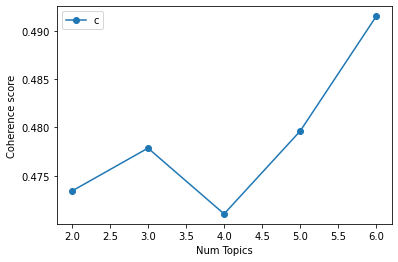

In [67]:
# recall that the higher the coherence score the better (meaning that the terms in the topic are related)
# the plot below shows that the highest scores correspond to a number of topics between 20 and 25
# again, this a human-in-the-loop process, you can't rely on a measurement alone to determine the ideal number of topics
# because of the 3 topics that I'm working with here don't really don't overlap, there is a clear winning for the ideal number of topics 

limit=7; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values, "o-")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [62]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.463
Num Topics = 3  has Coherence Value of 0.4733
Num Topics = 4  has Coherence Value of 0.5109


/Users/alexanderbarriga/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
